In [1]:
import pandas as pd
import os
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cmocean

In [2]:
chlor = pd.DataFrame()

fdir = '/Users/bell/ecoraid/2021/AlongTrack/dy2103/SCS Data DY2103 pt1/Fluorometer/'

parser = lambda date: pd.datetime.strptime(date, '%d%b%Y')

for f in sorted(os.listdir(fdir)):
    if 'Chloro-MSG' in f:
        print(f)
        try:
            chlor = chlor.append(pd.read_csv(fdir+f,header=None,parse_dates=[[0,1]],index_col='0_1'))
        except:
            pass
        
        
fdir = '/Users/bell/ecoraid/2021/AlongTrack/dy2103/SCS Data DY2103 pt2/Fluorometer/'
for f in sorted(os.listdir(fdir)):
    if ('Chloro-MSG' in f) and not ('._' in f):
        print(f)
        try:
            chlor = chlor.append(pd.read_csv(fdir+f,header=None,parse_dates=[[0,1]],index_col='0_1'))
        except:
            print(f'error in {f}')
            pass
chlor = chlor[chlor[2].notnull()==True]
chlor = chlor.set_index(pd.DatetimeIndex(chlor.index))

Chloro-MSG_20210501-150748.Raw
Chloro-MSG_20210501-150836.Raw
Chloro-MSG_20210502-000000.Raw
Chloro-MSG_20210503-000000.Raw
Chloro-MSG_20210504-000000.Raw
Chloro-MSG_20210505-000000.Raw
Chloro-MSG_20210506-000000.Raw
Chloro-MSG_20210507-000000.Raw
Chloro-MSG_20210508-000000.Raw
Chloro-MSG_20210509-000000.Raw
Chloro-MSG_20210510-000000.Raw
Chloro-MSG_20210510-212643.Raw
Chloro-MSG_20210511-000000.Raw
Chloro-MSG_20210512-000000.Raw
Chloro-MSG_20210513-000000.Raw
Chloro-MSG_20210514-000000.Raw
Chloro-MSG_20210515-000000.Raw
Chloro-MSG_20210516-000000.Raw
Chloro-MSG_20210517-000000.Raw
Chloro-MSG_20210518-000000.Raw
error in Chloro-MSG_20210518-000000.Raw


In [3]:
gps = pd.DataFrame()

fdir = '/Users/bell/ecoraid/2021/AlongTrack/dy2103/SCS Data DY2103 pt1/GPSGP170/'
for f in sorted(os.listdir(fdir)):
    if ('GPRMC' in f) and not ('._' in f):
        print(f)
        try:
            gps = gps.append(pd.read_csv(fdir+f,header=None,parse_dates=[[0,1]],index_col='0_1'))
        except:
            print(f'error in {f}')
            pass
        
fdir = '/Users/bell/ecoraid/2021/AlongTrack/dy2103/SCS Data DY2103 pt2/GPSGP170/'
for f in sorted(os.listdir(fdir)):
    if ('GPRMC' in f) and not ('._' in f):
        print(f)
        try:
            gps = gps.append(pd.read_csv(fdir+f,header=None,parse_dates=[[0,1]],index_col='0_1'))
        except:
            print(f'error in {f}')
            pass

GP170-GPRMC-RAW_20210501-150748.Raw
GP170-GPRMC-RAW_20210501-150836.Raw
GP170-GPRMC-RAW_20210502-000000.Raw
GP170-GPRMC-RAW_20210503-000000.Raw
GP170-GPRMC-RAW_20210504-000000.Raw
GP170-GPRMC-RAW_20210505-000000.Raw
GP170-GPRMC-RAW_20210506-000000.Raw
GP170-GPRMC-RAW_20210507-000000.Raw
GP170-GPRMC-RAW_20210508-000000.Raw
GP170-GPRMC-RAW_20210509-000000.Raw
GP170-GPRMC-RAW_20210510-000000.Raw
GP170-GPRMC-RAW_20210510-212643.Raw
GP170-GPRMC-RAW_20210511-000000.Raw
GP170-GPRMC-RAW_20210512-000000.Raw
GP170-GPRMC-RAW_20210513-000000.Raw
GP170-GPRMC-RAW_20210514-000000.Raw
GP170-GPRMC-RAW_20210515-000000.Raw
GP170-GPRMC-RAW_20210516-000000.Raw
GP170-GPRMC-RAW_20210517-000000.Raw
GP170-GPRMC-RAW_20210518-000000.Raw
error in GP170-GPRMC-RAW_20210518-000000.Raw


In [4]:
merged = pd.concat([chlor.resample('1T').mean(),gps.resample('1T').mean()],axis=1)
merged.columns = ['chlor', 4, 5, 3, 'lat', 'lon', 9, 10, 11, 12]

In [5]:
merged.sample()

,chlor,4,5,3,lat,lon,9,10,11,12
0_1,,,,,,,,,,
2021-05-14 10:52:00,6.403,547.216667,NaN,105227.833333,5348.381528,16717.642127,10.676667,200.19,140521.0,8.8


In [6]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12,12),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

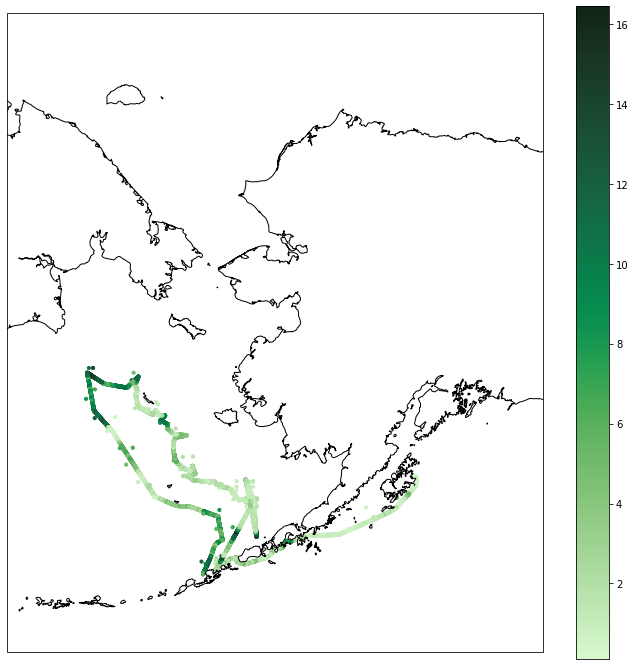

In [14]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

extent=[-179.5, -145, 50, 74]

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)


c = ax.scatter(y=(np.floor(merged.lat/100) + ((merged.lat/100)-np.floor(merged.lat/100))*100 /60), 
               x=-1*(np.floor(merged.lon/100) + ((merged.lon/100)-np.floor(merged.lon/100))*100 /60), s=10,
                               c=merged.chlor, cmap=cmocean.cm.algae,
                               transform=transformation)
plt.colorbar(c)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)
        

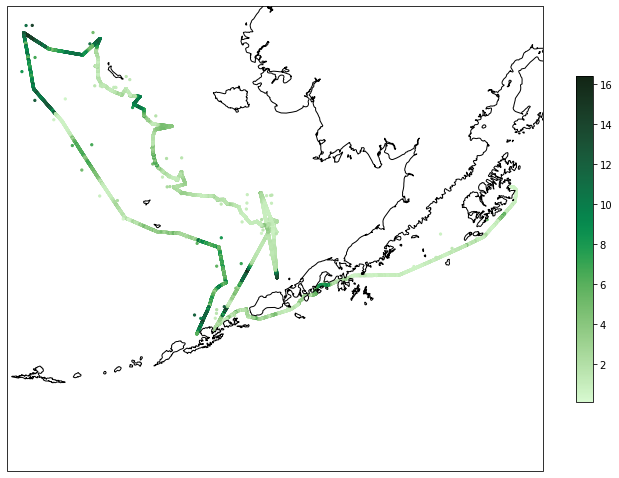

In [117]:
projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()

extent=[-175, -152, 50, 62]

land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                                edgecolor='face',
                                                facecolor='1.0')

fig,ax = make_map(projection=projection)


c = ax.scatter(y=(np.floor(merged.lat/100) + ((merged.lat/100)-np.floor(merged.lat/100))*100 /60), 
               x=-1*(np.floor(merged.lon/100) + ((merged.lon/100)-np.floor(merged.lon/100))*100 /60), s=5,
                               c=merged.chlor, cmap=cmocean.cm.algae,
                               transform=transformation)
plt.colorbar(c,shrink=.5)
ax.add_feature(land_50m)
ax.coastlines(resolution='10m')
ax.set_extent(extent)
        

In [7]:
merged['latitude']= (np.floor(merged.lat/100) + ((merged.lat/100)-np.floor(merged.lat/100))*100 /60)
merged['longitude'] = -1*(np.floor(merged.lon/100) + ((merged.lon/100)-np.floor(merged.lon/100))*100 /60)

In [8]:
merged[['chlor','latitude','longitude']].to_csv('dy2103_chlor_underway.csv')